<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.923666,31.246844,40.076490,4.837317,174.084317,171.236982,2.847334
1,0.0,1.0,60.506957,66.246527,29.714724,17.412864,183.881071,169.760945,14.120126
2,0.0,2.0,29.623992,84.806212,52.150590,-8.049557,168.531238,175.640379,-7.109141
3,0.0,3.0,59.408135,46.323576,22.976824,10.007050,148.715584,140.842506,7.873078
4,0.0,4.0,98.235811,66.863297,99.730176,4.682065,279.511349,274.471384,5.039965
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.332463,99.844117,46.307492,24.865244,243.349316,213.624532,29.724784
29996,999.0,26.0,71.188922,65.697517,54.877850,-22.295108,179.469181,198.579126,-19.109945
29997,999.0,27.0,82.348403,66.973766,52.090357,0.517359,211.929885,207.570481,4.359404
29998,999.0,28.0,20.363657,28.976991,94.434609,7.129964,160.905222,152.971598,7.933624


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.923666,31.246844,40.076490,4.837317,174.084317,171.236982,2.847334
1,0.0,1.0,60.506957,66.246527,29.714724,17.412864,183.881071,169.760945,14.120126
2,0.0,2.0,29.623992,84.806212,52.150590,-8.049557,168.531238,175.640379,-7.109141
3,0.0,3.0,59.408135,46.323576,22.976824,10.007050,148.715584,140.842506,7.873078
4,0.0,4.0,98.235811,66.863297,99.730176,4.682065,279.511349,274.471384,5.039965
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.332463,99.844117,46.307492,24.865244,243.349316,213.624532,29.724784
29996,999.0,26.0,71.188922,65.697517,54.877850,-22.295108,179.469181,198.579126,-19.109945
29997,999.0,27.0,82.348403,66.973766,52.090357,0.517359,211.929885,207.570481,4.359404
29998,999.0,28.0,20.363657,28.976991,94.434609,7.129964,160.905222,152.971598,7.933624


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.923666  31.246844  40.076490  ...  174.084317  171.236982   2.847334
      1.0    60.506957  66.246527  29.714724  ...  183.881071  169.760945  14.120126
      2.0    29.623992  84.806212  52.150590  ...  168.531238  175.640379  -7.109141
      3.0    59.408135  46.323576  22.976824  ...  148.715584  140.842506   7.873078
      4.0    98.235811  66.863297  99.730176  ...  279.511349  274.471384   5.039965
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.332463  99.844117  46.307492  ...  243.349316  213.624532  29.724784
      26.0   71.188922  65.697517  54.877850  ...  179.469181  198.579126 -19.109945
      27.0   82.348403  66.973766  52.090357  ...  211.929885  207.570481   4.359404
      28.0   20.363657  28.976991  94.434609  ...  160.905222  152.971598   7.933624
      29.0   37.597754  49.017579  70.899809  ...  173.594160  166.569122   7.025038

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.923666  31.246844  40.076490  ...  174.084317  171.236982   2.847334
      1.0    60.506957  66.246527  29.714724  ...  183.881071  169.760945  14.120126
      2.0    29.623992  84.806212  52.150590  ...  168.531238  175.640379  -7.109141
      3.0    59.408135  46.323576  22.976824  ...  148.715584  140.842506   7.873078
      4.0    98.235811  66.863297  99.730176  ...  279.511349  274.471384   5.039965
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.332463  99.844117  46.307492  ...  243.349316  213.624532  29.724784
      26.0   71.188922  65.697517  54.877850  ...  179.469181  198.579126 -19.109945
      27.0   82.348403  66.973766  52.090357  ...  211.929885  207.570481   4.359404
      28.0   20.363657  28.976991  94.434609  ...  160.905222  152.971598   7.933624
      29.0   37.597754  49.017579  70.899809  ...  173.594160  166.569122   7.025038

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.923666,31.246844,40.076490,4.837317,174.084317,171.236982,2.847334
1,0.0,1.0,60.506957,66.246527,29.714724,17.412864,183.881071,169.760945,14.120126
2,0.0,2.0,29.623992,84.806212,52.150590,-8.049557,168.531238,175.640379,-7.109141
3,0.0,3.0,59.408135,46.323576,22.976824,10.007050,148.715584,140.842506,7.873078
4,0.0,4.0,98.235811,66.863297,99.730176,4.682065,279.511349,274.471384,5.039965
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.332463,99.844117,46.307492,24.865244,243.349316,213.624532,29.724784
29996,999.0,26.0,71.188922,65.697517,54.877850,-22.295108,179.469181,198.579126,-19.109945
29997,999.0,27.0,82.348403,66.973766,52.090357,0.517359,211.929885,207.570481,4.359404
29998,999.0,28.0,20.363657,28.976991,94.434609,7.129964,160.905222,152.971598,7.933624


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.923666  31.246844  40.076490  ...  174.084317  171.236982   2.847334
      1.0    60.506957  66.246527  29.714724  ...  183.881071  169.760945  14.120126
      2.0    29.623992  84.806212  52.150590  ...  168.531238  175.640379  -7.109141
      3.0    59.408135  46.323576  22.976824  ...  148.715584  140.842506   7.873078
      4.0    98.235811  66.863297  99.730176  ...  279.511349  274.471384   5.039965
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.332463  99.844117  46.307492  ...  243.349316  213.624532  29.724784
      26.0   71.188922  65.697517  54.877850  ...  179.469181  198.579126 -19.109945
      27.0   82.348403  66.973766  52.090357  ...  211.929885  207.570481   4.359404
      28.0   20.363657  28.976991  94.434609  ...  160.905222  152.971598   7.933624
      29.0   37.597754  49.017579  70.899809  ...  173.594160  166.569122   7.025038

[30000 rows x 7 columns]

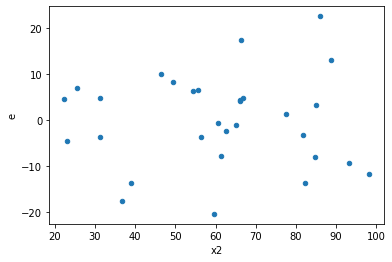

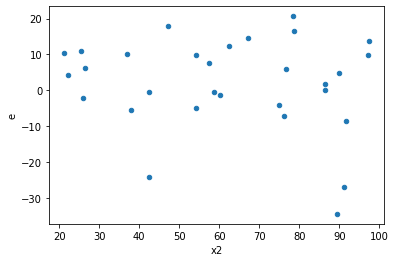

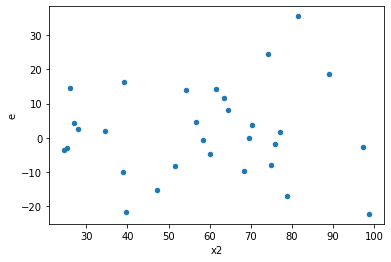

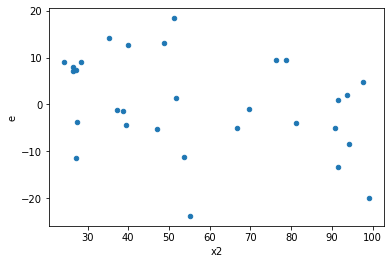

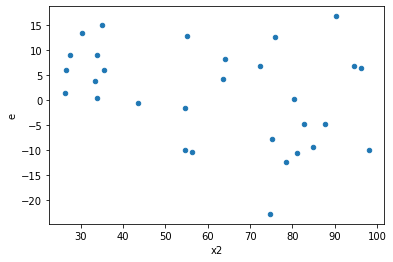

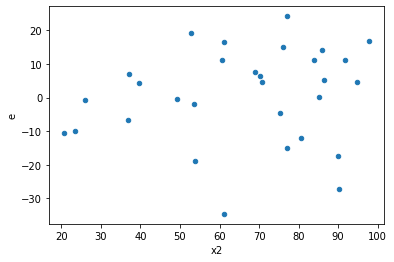

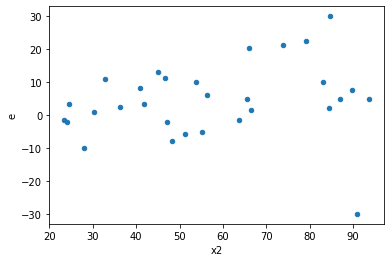

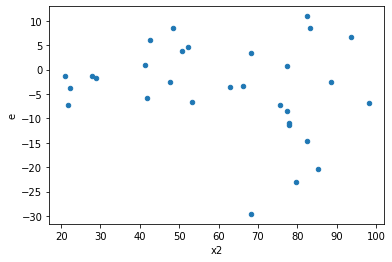

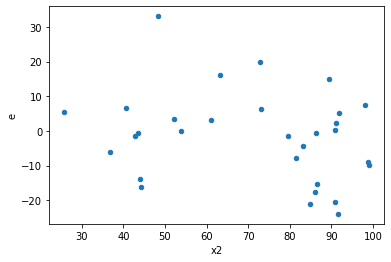

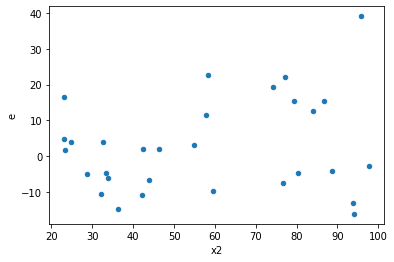

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,673.3696134836798,981.2700773742667,74.81884594263109,109.03000859714075,1.4572532792171344,0.5838127399504032,0.7080936300247984,0.2919063699752016,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,1061.9479737066195,2284.7119355036475,117.9942193007355,253.8568817226275,2.151434902718536,0.26918903260189464,0.8654054836990527,0.13459451630094732,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1344.9865619323489,1531.6754907887787,149.44295132581655,170.18616564319763,1.1388035643926528,0.8496445099170398,0.5751777450414801,0.4248222549585199,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,350.1885561507357,501.83148522763213,38.909839572303966,55.75905391418135,1.433032223393454,0.6005783648789187,0.6997108175605407,0.30028918243945935,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,280.01318730610143,915.8510552912742,31.1125763673446,101.76122836569714,3.270742582170229,0.09230821302784897,0.9538458934860755,0.04615410651392449,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,364.3466748904705,2657.900124931863,40.48296387671895,295.3222361035403,7.2949756594619055,0.006765790622632384,0.9966171046886838,0.003382895311316192,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,255.326896841888,1307.9190950815764,28.369655204654222,145.32434389795293,5.122527674362131,0.023141023967709007,0.9884294880161455,0.011570511983854503,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,64.50946729625873,967.6023331446769,7.167718588473193,107.51137034940854,14.999384953854571,0.0004207116746064443,0.9997896441626968,0.00021035583730322216,Reject001=0 : Heteroscedasticity
9.0,9.0,9.0,530.1639656603226,1729.4306578080984,58.907107295591395,192.1589619786776,3.2620675297199457,0.09300359301178718,0.9534982034941064,0.04650179650589359,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,673.3696134836798,981.2700773742667,74.81884594263109,109.03000859714075,1.4572532792171344,0.5838127399504032,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,1061.9479737066195,2284.7119355036475,117.9942193007355,253.8568817226275,2.151434902718536,0.26918903260189464,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,1344.9865619323489,1531.6754907887787,149.44295132581655,170.18616564319763,1.1388035643926528,0.8496445099170398,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,350.1885561507357,501.83148522763213,38.909839572303966,55.75905391418135,1.433032223393454,0.6005783648789187,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,280.01318730610143,915.8510552912742,31.1125763673446,101.76122836569714,3.270742582170229,0.09230821302784897,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,364.3466748904705,2657.900124931863,40.48296387671895,295.3222361035403,7.2949756594619055,0.006765790622632384,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,255.326896841888,1307.9190950815764,28.369655204654222,145.32434389795293,5.122527674362131,0.023141023967709007,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,64.50946729625873,967.6023331446769,7.167718588473193,107.51137034940854,14.999384953854571,0.0004207116746064443,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1664.004787642224,1541.2571476450762,184.889420849136,171.25079418278625,0.9262336016646489,0.910992053003481,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      885
Reject001=0 : Heteroscedasticity    115
Name: Result_test, dtype: int64